# **1. Simulate a dataset for classification with 3 labels, 6 attributes (with interactions among them), 10,000 instances, using a uniform random function.**

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd

n_samples = 10000
n_features = 6
n_classes = 3

X_classification, y_classification = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=4,
    n_redundant=1,
    n_classes=n_classes,
    random_state=42
)

classification_data = pd.DataFrame(X_classification, columns=[f"Feature_{i+1}" for i in range(n_features)])
classification_data['Label'] = y_classification

classification_path = "/content/classification_dataset.csv"
classification_data.to_csv(classification_path, index=False)
print(f"Classification dataset saved at: {classification_path}")
classification_data.head()

Classification dataset saved at: /content/classification_dataset.csv


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Label
0,-0.175973,-0.448796,-0.753919,2.494458,0.489616,1.132985,0
1,-1.389745,2.849095,3.289939,2.416408,-2.014501,0.020135,1
2,-1.354713,4.317840,4.373057,4.169742,-3.455899,1.161818,1
3,0.788738,0.918924,-0.718676,-1.140185,-1.407130,-2.523809,0
4,2.077330,-0.686682,-0.218004,2.748919,1.095996,1.314724,0


# **2. Simulate a dataset for regression with 6 attributes (with interactions among them), 10,000 instances, using a normal random function.**

In [ ]:
import numpy as np
import pandas as pd

n_samples = 10000
n_features = 6
mean = 0
std = 1

X_regression = np.random.normal(loc=mean, scale=std, size=(n_samples, n_features))

y_regression = np.dot(X_regression, np.random.normal(size=n_features)) + np.random.normal(scale=0.1, size=n_samples)

regression_data = pd.DataFrame(X_regression, columns=[f"Feature_{i+1}" for i in range(n_features)])
regression_data['Target'] = y_regression

regression_path = "/content/regression_dataset.csv"
regression_data.to_csv(regression_path, index=False)
print(f"Regression dataset saved at: {regression_path}")
regression_data.head()

Regression dataset saved at: /content/regression_dataset.csv


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,0.553258,0.222744,0.062448,-0.982972,0.220032,-0.134156,-0.110515
1,-2.168561,-0.002397,0.802179,0.756163,-0.555017,-0.935319,4.296947
2,1.527486,-1.046843,-0.116953,1.808828,0.947921,0.427360,-2.044876
3,-1.252302,-0.873999,-2.131286,-0.535545,-1.413767,-0.011590,-2.183681
4,-0.017058,0.848330,-0.266099,0.566235,0.931255,-0.755110,-1.657076


# **3. Simulate a dataset for clustering with 6 attributes (with interactions among them), 10,000 instances, using a normal random function.**

In [ ]:
import numpy as np
import pandas as pd

n_samples = 10000
n_features = 6
n_clusters = 3
mean = 0
std = 1

X_clustering = np.random.normal(loc=mean, scale=std, size=(n_samples, n_features))

cluster_centers = np.random.normal(loc=mean, scale=std, size=(n_clusters, n_features))
y_clustering = np.argmin(np.linalg.norm(X_clustering[:, np.newaxis] - cluster_centers, axis=2), axis=1)

clustering_data = pd.DataFrame(X_clustering, columns=[f"Feature_{i+1}" for i in range(n_features)])
clustering_data['Cluster'] = y_clustering

clustering_path = "/content/clustering_dataset.csv"
clustering_data.to_csv(clustering_path, index=False)
print(f"Clustering dataset saved at: {clustering_path}")
clustering_data.head()

Clustering dataset saved at: /content/clustering_dataset.csv


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Cluster
0,-0.720510,-1.904268,0.092688,0.114481,-1.327387,-0.244536,1
1,1.109829,-1.716990,0.089169,0.733573,-1.101484,-1.794550,1
2,-0.458165,-3.244830,0.902047,1.146300,0.804458,0.526948,1
3,0.210450,-0.445846,-0.329761,-0.408567,-1.975027,0.967333,1
4,1.018544,-1.348662,1.308031,-1.929870,-0.920057,-0.823611,1


# **4. Build a non-linear regression model and achieve 90% accuracy on the simulated data from question 2. Split the data into 70% for training and 30% for testing to build the model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data_path = '/content/regression_dataset.csv'
data = pd.read_csv(data_path)

X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

r2_score = model.score(X_test, y_test)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2_score}")

Root Mean Squared Error (RMSE): 0.36405632661861154
R^2 Score: 0.9842336367267571


# **5. Build five classifiers for the dataset in question 1 and compare the metrics of these models. The metrics to be evaluated are Accuracy, Precision, Recall, and F1 Score. Split the data into 70% for training and 30% for testing to build the models.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data_path = '/content/classification_dataset.csv'
data = pd.read_csv(data_path)

X = data.drop('Label', axis=1)
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = round(accuracy_score(y_test, rf_pred), 4)
rf_precision = round(precision_score(y_test, rf_pred, average='weighted'), 4)
rf_recall = round(recall_score(y_test, rf_pred, average='weighted'), 4)
rf_f1 = round(f1_score(y_test, rf_pred, average='weighted'), 4)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_accuracy = round(accuracy_score(y_test, gb_pred), 4)
gb_precision = round(precision_score(y_test, gb_pred, average='weighted'), 4)
gb_recall = round(recall_score(y_test, gb_pred, average='weighted'), 4)
gb_f1 = round(f1_score(y_test, gb_pred, average='weighted'), 4)

svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = round(accuracy_score(y_test, svm_pred), 4)
svm_precision = round(precision_score(y_test, svm_pred, average='weighted'), 4)
svm_recall = round(recall_score(y_test, svm_pred, average='weighted'), 4)
svm_f1 = round(f1_score(y_test, svm_pred, average='weighted'), 4)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = round(accuracy_score(y_test, lr_pred), 4)
lr_precision = round(precision_score(y_test, lr_pred, average='weighted'), 4)
lr_recall = round(recall_score(y_test, lr_pred, average='weighted'), 4)
lr_f1 = round(f1_score(y_test, lr_pred, average='weighted'), 4)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = round(accuracy_score(y_test, knn_pred), 4)
knn_precision = round(precision_score(y_test, knn_pred, average='weighted'), 4)
knn_recall = round(recall_score(y_test, knn_pred, average='weighted'), 4)
knn_f1 = round(f1_score(y_test, knn_pred, average='weighted'), 4)

print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1 Score: {rf_f1}")
print(f"Gradient Boosting - Accuracy: {gb_accuracy}, Precision: {gb_precision}, Recall: {gb_recall}, F1 Score: {gb_f1}")
print(f"SVM - Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}, F1 Score: {svm_f1}")
print(f"Logistic Regression - Accuracy: {lr_accuracy}, Precision: {lr_precision}, Recall: {lr_recall}, F1 Score: {lr_f1}")
print(f"K-Nearest Neighbors - Accuracy: {knn_accuracy}, Precision: {knn_precision}, Recall: {knn_recall}, F1 Score: {knn_f1}")

Random Forest - Accuracy: 0.8493, Precision: 0.8498, Recall: 0.8493, F1 Score: 0.8495
Gradient Boosting - Accuracy: 0.8323, Precision: 0.8323, Recall: 0.8323, F1 Score: 0.8323
SVM - Accuracy: 0.849, Precision: 0.8523, Recall: 0.849, F1 Score: 0.8496
Logistic Regression - Accuracy: 0.665, Precision: 0.6658, Recall: 0.665, F1 Score: 0.6636
K-Nearest Neighbors - Accuracy: 0.8477, Precision: 0.8496, Recall: 0.8477, F1 Score: 0.8481


# **6. Load CSV, Excel, and JSON format datasets from the local host and websites into the Colab interface, and split them into training and testing data.**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

california = fetch_california_housing()
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Training data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")

Training data size: (14448, 8)
Test data size: (6192, 8)


# **7. Load different datasets from the scikit-learn library into the Colab interface, split them into training and testing data, and apply normalization techniques to standardize the input data.**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris, load_digits, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

def load_and_process_dataset(dataset_name):
    if dataset_name == 'iris':
        dataset = load_iris()
    elif dataset_name == 'digits':
        dataset = load_digits()
    elif dataset_name == 'california':
        dataset = fetch_california_housing()
    else:
        raise ValueError("Dataset not supported")

    X = dataset.data
    y = dataset.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if dataset_name in ['iris', 'digits']:
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {dataset_name} dataset: {accuracy:.4f}")
    else:
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error for {dataset_name} dataset: {mse:.4f}")

    return

load_and_process_dataset('iris')
load_and_process_dataset('digits')
load_and_process_dataset('california')

Accuracy for iris dataset: 1.0000
Accuracy for digits dataset: 0.9741
Mean Squared Error for california dataset: 0.2568


# **8. Load any data from a website or local host and apply the following data wrangling techniques:**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**a) Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((105, 4), (45, 4), (105,), (45,))

**b) Merge Data**

In [ ]:
df_additional = df.copy()
df_additional['new_column'] = df_additional['sepal length (cm)'] * 2

merged_df = pd.merge(df, df_additional[['new_column']], left_index=True, right_index=True)

merged_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,new_column
0,5.1,3.5,1.4,0.2,0,10.2
1,4.9,3.0,1.4,0.2,0,9.8
2,4.7,3.2,1.3,0.2,0,9.4
3,4.6,3.1,1.5,0.2,0,9.2
4,5.0,3.6,1.4,0.2,0,10.0


**c) Select Rows by Conditions**

In [ ]:
selected_rows = df[df['sepal length (cm)'] > 5]

selected_rows.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
10,5.4,3.7,1.5,0.2,0
14,5.8,4.0,1.2,0.2,0
15,5.7,4.4,1.5,0.4,0


**d) Select Columns by Conditions**

In [ ]:
selected_columns = df.loc[:, df.mean() > 3]

selected_columns.head()

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


**e) Rename Columns**

In [ ]:
df.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width'}, inplace=True)

df.head()

,sepal_length,sepal_width,petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**f) Min, Max, Avg, Variance**

In [ ]:
min_values = df.min()
max_values = df.max()
mean_values = df.mean()
variance_values = df.var()

(min_values, max_values, mean_values, variance_values)

(sepal_length         4.3
 sepal_width          2.0
 petal length (cm)    1.0
 petal width (cm)     0.1
 target               0.0
 dtype: float64,
 sepal_length         7.9
 sepal_width          4.4
 petal length (cm)    6.9
 petal width (cm)     2.5
 target               2.0
 dtype: float64,
 sepal_length         5.843333
 sepal_width          3.057333
 petal length (cm)    3.758000
 petal width (cm)     1.199333
 target               1.000000
 dtype: float64,
 sepal_length         0.685694
 sepal_width          0.189979
 petal length (cm)    3.116278
 petal width (cm)     0.581006
 target               0.671141
 dtype: float64)

**g) Describe**

In [ ]:
df.describe()

,sepal_length,sepal_width,petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**h) Size**

In [ ]:
df.size

750

**i) Shape**

In [ ]:
df.shape

(150, 5)

**j) Find Unique Values**

In [ ]:
df['target'].unique()

array([0, 1, 2])

**k) Find Missing Values and Fill**

In [ ]:
df.isnull().sum()

df.fillna(df.mean(), inplace=True)

**l) Replace Attribute Value with Another Name**

In [ ]:
df['target'] = df['target'].replace(0, 'flower1')

df.head()

,sepal_length,sepal_width,petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,flower1
1,4.9,3.0,1.4,0.2,flower1
2,4.7,3.2,1.3,0.2,flower1
3,4.6,3.1,1.5,0.2,flower1
4,5.0,3.6,1.4,0.2,flower1


**m) Delete Columns**

In [ ]:
df.drop(columns=['sepal_width'], inplace=True)

df.head()

,sepal_length,petal length (cm),petal width (cm),target
0,5.1,1.4,0.2,flower1
1,4.9,1.4,0.2,flower1
2,4.7,1.3,0.2,flower1
3,4.6,1.5,0.2,flower1
4,5.0,1.4,0.2,flower1


**n) Delete Rows**

In [ ]:
df = df[df['target'] != 1]

df.head()

,sepal_length,petal length (cm),petal width (cm),target
0,5.1,1.4,0.2,flower1
1,4.9,1.4,0.2,flower1
2,4.7,1.3,0.2,flower1
3,4.6,1.5,0.2,flower1
4,5.0,1.4,0.2,flower1


**o) Join Datasets (Left/Right)**

In [ ]:
print("Available columns:", df.columns)

if 'sepal_length' in df.columns and 'sepal_width' in df.columns:
    df2 = df[['sepal_length', 'sepal_width']]
else:
    df2 = df[['sepal_length']]

joined_df = df.join(df2, lsuffix='_original', rsuffix='_joined')

joined_df.head()

Available columns: Index(['sepal_length', 'petal length (cm)', 'petal width (cm)', 'target'], dtype='object')


,sepal_length_original,petal length (cm),petal width (cm),target,sepal_length_joined
0,5.1,1.4,0.2,flower1,5.1
1,4.9,1.4,0.2,flower1,4.9
2,4.7,1.3,0.2,flower1,4.7
3,4.6,1.5,0.2,flower1,4.6
4,5.0,1.4,0.2,flower1,5.0


**p) Group Values by Rows**

In [ ]:
grouped_by_target = df.groupby('target').mean()

grouped_by_target

,sepal_length,petal length (cm),petal width (cm)
target,,,
2,6.588,5.552,2.026
flower1,5.006,1.462,0.246


**q) Loop Over Columns**

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Mean of {column}: {df[column].mean()}")

Mean of sepal_length: 5.797
Mean of petal length (cm): 3.5069999999999997
Mean of petal width (cm): 1.136


**r) Group Rows by Time**

In [ ]:
import pandas as pd

df['datetime'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

df['year'] = df['datetime'].dt.year

numeric_columns = df.select_dtypes(include='number')

grouped_by_year = numeric_columns.groupby(df['year']).mean()

print("Grouped by year (mean values):")
print(grouped_by_year)

Grouped by year (mean values):
      sepal_length  petal length (cm)  petal width (cm)  month    year
year                                                                  
2023         5.797              3.507             1.136    2.2  2023.0


**s) Concatenate Datasets**

In [ ]:
concatenated_df = pd.concat([df, df2], axis=0)

concatenated_df.head()

,sepal_length,petal length (cm),petal width (cm),target,time,month,datetime,year
0,5.1,1.4,0.2,flower1,2023-01-01,1.0,2023-01-01,2023.0
1,4.9,1.4,0.2,flower1,2023-01-02,1.0,2023-01-02,2023.0
2,4.7,1.3,0.2,flower1,2023-01-03,1.0,2023-01-03,2023.0
3,4.6,1.5,0.2,flower1,2023-01-04,1.0,2023-01-04,2023.0
4,5.0,1.4,0.2,flower1,2023-01-05,1.0,2023-01-05,2023.0


**t) Append Rows**

In [ ]:
import pandas as pd

df1 = pd.DataFrame({
    'sepal_length': [5.1, 4.9],
    'sepal_width': [3.5, 3.0],
    'petal_length': [1.4, 1.4],
    'petal_width': [0.2, 0.2],
    'class': ['setosa', 'setosa']
})

df2 = pd.DataFrame({
    'sepal_length': [5.7, 5.8],
    'sepal_width': [3.8, 2.7],
    'petal_length': [4.5, 5.1],
    'petal_width': [1.4, 1.9],
    'class': ['versicolor', 'versicolor']
})

df_appended = pd.concat([df1, df2], ignore_index=True)

print(df_appended)

   sepal_length  sepal_width  petal_length  petal_width       class
0           5.1          3.5           1.4          0.2      setosa
1           4.9          3.0           1.4          0.2      setosa
2           5.7          3.8           4.5          1.4  versicolor
3           5.8          2.7           5.1          1.9  versicolor


**u) Append Columns**

In [ ]:
df['new_column'] = df['sepal_length'] * 2

df.head()

,sepal_length,petal length (cm),petal width (cm),target,time,month,datetime,year,new_column
0,5.1,1.4,0.2,flower1,2023-01-01,1,2023-01-01,2023,10.2
1,4.9,1.4,0.2,flower1,2023-01-02,1,2023-01-02,2023,9.8
2,4.7,1.3,0.2,flower1,2023-01-03,1,2023-01-03,2023,9.4
3,4.6,1.5,0.2,flower1,2023-01-04,1,2023-01-04,2023,9.2
4,5.0,1.4,0.2,flower1,2023-01-05,1,2023-01-05,2023,10.0


**v) Reorder Columns**

In [ ]:
df = df[['target', 'sepal_length', 'new_column', 'time', 'sepal_width']]

print(df)

   target  sepal_length  new_column        time  sepal_width
0       0           5.1         8.6  2023-01-01          3.5
1       0           4.9         7.9  2023-01-02          3.0
2       1           5.7         9.5  2023-01-03          3.8
3       1           5.8         8.5  2023-01-04          2.7


# **9. Load the images and audio files, convert the audio file into a spectrogram, and apply it to a one-minute Telugu song. Convert a color image into a grayscale image.**

In [ ]:
!pip install librosa matplotlib pydub pillow

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from pydub import AudioSegment
from PIL import Image
from google.colab import files

In [ ]:
print("Upload your image file:")
uploaded_image = files.upload()

image_path = list(uploaded_image.keys())[0]
image = Image.open(image_path)
image.show()

Upload your image file:


Saving image.jpg to image.jpg


In [ ]:
print("Upload your audio (MP3) file:")
uploaded_audio = files.upload()

audio_path = list(uploaded_audio.keys())[0]
audio = AudioSegment.from_mp3(audio_path)

Upload your audio (MP3) file:


Saving audio.mp3 to audio.mp3


In [ ]:
wav_audio_path = 'converted_audio.wav'
audio.export(wav_audio_path, format='wav')

<_io.BufferedRandom name='converted_audio.wav'>

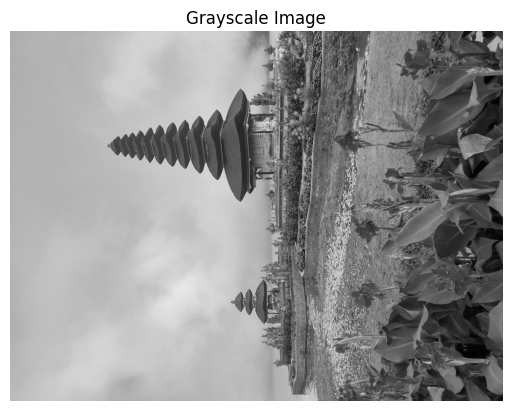

In [ ]:
grayscale_image = image.convert('L')

plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

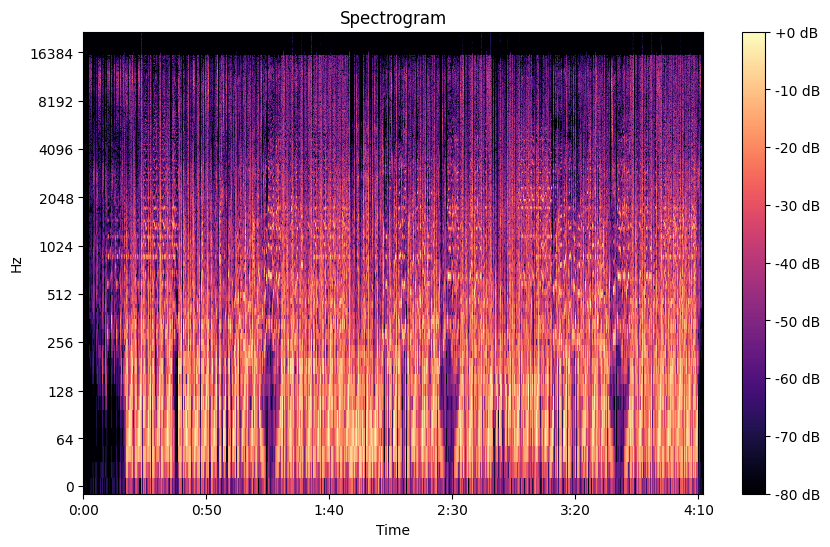

In [ ]:
y, sr = librosa.load(wav_audio_path, sr=None)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [ ]:
grayscale_image_path = 'grayscale_image.jpg'
grayscale_image.save(grayscale_image_path)

files.download(grayscale_image_path)

files.download(wav_audio_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **10. Load any numeric dataset and apply Ridge and Lasso regressions to achieve 90% accuracy.**

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

california = fetch_california_housing()
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Ridge Regression R²: {ridge_r2}')
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Lasso Regression R²: {lasso_r2}')

Ridge Regression MSE: 0.5558034669932196
Ridge Regression R²: 0.5758549611440138
Lasso Regression MSE: 0.6135115198058131
Lasso Regression R²: 0.5318167610318159


# **11. Load the Digits dataset and apply clustering models to obtain its metrics.**

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
kmeans_labels = kmeans.predict(X_test_scaled)
kmeans_silhouette = silhouette_score(X_test_scaled, kmeans_labels)

dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X_test_scaled)
dbscan_silhouette = silhouette_score(X_test_scaled, dbscan_labels)

agg_clust = AgglomerativeClustering(n_clusters=3)
agg_clust_labels = agg_clust.fit_predict(X_test_scaled)
agg_clust_silhouette = silhouette_score(X_test_scaled, agg_clust_labels)

print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
print(f"Agglomerative Clustering Silhouette Score: {agg_clust_silhouette:.4f}")

KMeans Silhouette Score: 0.3134
DBSCAN Silhouette Score: -0.2952
Agglomerative Clustering Silhouette Score: 0.3180


# **12. Implement techniques to handle an imbalanced dataset and convert it into a balanced dataset with binary class data.**

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=6, n_classes=2,
                            weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

undersample = RandomUnderSampler(random_state=42)
X_res_undersampled, y_res_undersampled = undersample.fit_resample(X_train, y_train)

smoteenn = SMOTEENN(random_state=42)
X_res_smoteenn, y_res_smoteenn = smoteenn.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y)}")
print(f"SMOTE class distribution: {Counter(y_res)}")
print(f"Undersampled class distribution: {Counter(y_res_undersampled)}")
print(f"SMOTEENN class distribution: {Counter(y_res_smoteenn)}")

Original class distribution: Counter({0: 898, 1: 102})
SMOTE class distribution: Counter({0: 618, 1: 618})
Undersampled class distribution: Counter({0: 82, 1: 82})
SMOTEENN class distribution: Counter({1: 579, 0: 542})


# **13. Apply the KNN classifier on the appropriate data. Find the best neighborhood size, indices of the neighborhood, and distances of the neighborhood by taking a random new tuple.**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

data = fetch_california_housing()
X = data.data
y = (data.target > np.median(data.target)).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

random_index = np.random.randint(0, X_test_scaled.shape[0])
random_tuple = X_test_scaled[random_index].reshape(1, -1)
predicted_label = knn.predict(random_tuple)

distances, indices = knn.kneighbors(random_tuple)

print(f"Predicted Label for the random tuple: {predicted_label[0]}")
print(f"Indices of the neighborhood: {indices}")
print(f"Distances of the neighborhood: {distances}")

Predicted Label for the random tuple: 0
Indices of the neighborhood: [[2625 5294 8604 5004 2545]]
Distances of the neighborhood: [[0.27323752 0.33878555 0.48480721 0.48772651 0.50378931]]


# **14. Find the support vectors and their probabilities by applying SVM on any binary classification dataset. Also, identify the best model to generate support vectors and evaluate the metrics for this trained model. Additionally, represent its graph.**

Support Vectors:
 [[-0.50114341  0.03223285]
 [-0.57886786 -0.08591498]
 [-0.46072004 -0.16363943]
 [-0.07209776  0.4270997 ]
 [-0.80891894 -0.95025085]
 [-0.55865618 -0.18385112]
 [-0.14982222  0.30895188]
 [ 0.12065223  0.97741547]
 [ 0.43779463  0.430222  ]
 [ 0.12689681 -0.04236931]
 [ 0.22483295 -0.02215763]
 [ 0.1471085  -0.14030546]
 [-0.26172546 -0.63310845]
 [-0.43738606 -0.77146797]
 [-0.2042127  -0.41702448]
 [-0.06897547 -0.08279269]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.0


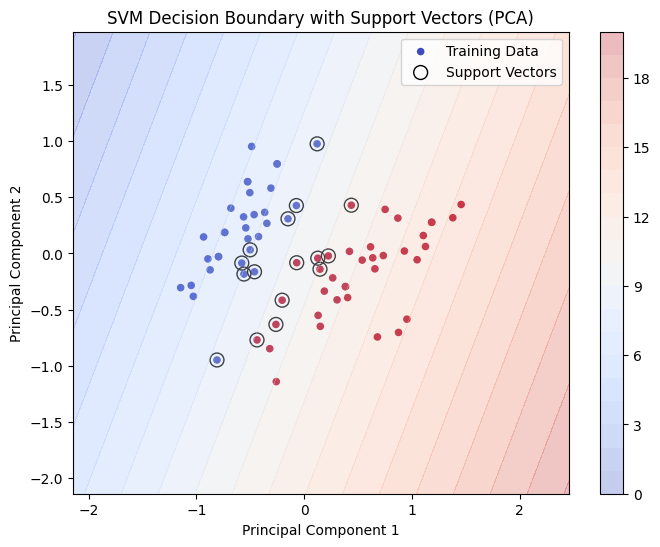

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_pca, y_train)

support_vectors = svm_model.support_vectors_

y_pred = svm_model.predict(X_test_pca)

print("Support Vectors:\n", support_vectors)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', s=20, label='Training Data')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], edgecolors='k', facecolors='none', s=100, label='Support Vectors')

xx, yy = np.meshgrid(np.linspace(X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1, 100),
                     np.linspace(X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

grid_original = pca.inverse_transform(grid)

Z = svm_model.decision_function(grid_original)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.3)
plt.colorbar()
plt.title("SVM Decision Boundary with Support Vectors (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.show()

# **15. Load a mixed-type feature dataset and apply an appropriate model. Predict the class for a new tuple and its probabilities.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

california = fetch_california_housing()
X = california.data
y = california.target

y_binary = (y > np.median(y)).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), np.arange(X.shape[1]))
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

new_tuple = np.array([[8.3252, 41.0004, 6.9841, 1.0236, 322, 2.5556, 37.88, -122.23]])
new_tuple_df = pd.DataFrame(new_tuple, columns=california.feature_names)

predicted_class = model.predict(new_tuple_df)
predicted_prob = model.predict_proba(new_tuple_df)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(f"Predicted class for the new tuple: {predicted_class}")
print(f"Probabilities for the new tuple: {predicted_prob}")

Accuracy Score: 0.8948643410852714
Predicted class for the new tuple: [1]
Probabilities for the new tuple: [[0. 1.]]
